In [70]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram

In [103]:
counting_bits = 4
psi = 1
qpe = QuantumCircuit( counting_bits + psi, counting_bits)

In [104]:
qpe.x(counting_bits)

In [105]:
for i in range(counting_bits):
    qpe.h(i)
n = 0
angle = 2*pi/8
for i in range(counting_bits):
    for j in range(pow(2,n)):
        qpe.cp(angle,n,counting_bits)
    n += 1

In [106]:
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤    │         │         │         │         │         │     »
q_3: ┤ H ├────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_4: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 4/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ────■─────────────────────────────────────────────────────────────────»
«         │                                                                 »
«q_3: ────┼─────────■─────────■─────────■─────────■─────────■─────────■─────»
«     ┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
«q_4: ┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
«     └────────┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
«c: 4/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                         
«q_0: ────────────────────
«                         
«q_1: ────────────────────
«                         
«q_2: ────────────────────
«                         
«q_3: ────■─────────■─────
«     ┌───┴────┐┌───┴────┐
«q_4: ┤ P(π/4) ├┤ P(π/4) ├
«     └────────┘└────────┘
«c: 4/════════════════════
«

In [107]:
def inverse_qft(qc,n):
    for i in range(n//2):
        qc.swap(i,n-i-1)
    for i in range(n):
        for j in range(i):
            qc.cp(-pi/float(2**(i-j)), j, i)
        qc.h(i)

In [108]:
qpe.barrier()
inverse_qft(qpe,counting_bits)
qpe.barrier()
for i in range(counting_bits):
    qpe.measure(i,i)

In [109]:
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤    │         │         │         │         │         │     »
q_3: ┤ H ├────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_4: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 4/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ────■─────────────────────────────────────────────────────────────────»
«         │                                                                 »
«q_3: ────┼─────────■─────────■─────────■─────────■─────────■─────────■─────»
«     ┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
«q_4: ┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
«     └────────┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
«c: 4/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                          ░    ┌───┐                                      »
«q_0: ─────────────────────░──X─┤ H ├─────■───────────────■────────────────»
«                          ░  │ └───┘┌────┴────┐┌───┐     │                »
«q_1: ─────────────────────░──┼───X──┤ P(-π/2) ├┤ H ├─────┼──────────■─────»
«                          ░  │   │  └─────────┘└───┘┌────┴────┐┌────┴────┐»
«q_2: ─────────────────────░──┼───X──────────────────┤ P(-π/4) ├┤ P(-π/2) ├»
«                          ░  │                      └─────────┘└─────────┘»
«q_3: ────■─────────■──────░──X────────────────────────────────────────────»
«     ┌───┴────┐┌───┴────┐ ░                                               »
«q_4: ┤ P(π/4) ├┤ P(π/4) ├─░───────────────────────────────────────────────»
«     └────────┘└────────┘ ░                                               »
«c: 4/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«                                                 ░ ┌─┐         
«q_0: ─────■──────────────────────────────────────░─┤M├─────────
«          │                                      ░ └╥┘┌─┐      
«q_1: ─────┼───────────────■──────────────────────░──╫─┤M├──────
«          │     ┌───┐     │                      ░  ║ └╥┘┌─┐   
«q_2: ─────┼─────┤ H ├─────┼──────────■───────────░──╫──╫─┤M├───
«     ┌────┴────┐└───┘┌────┴────┐┌────┴────┐┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ┤ P(-π/8) ├─────┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫──╫─┤M├
«     └─────────┘     └─────────┘└─────────┘└───┘ ░  ║  ║  ║ └╥┘
«q_4: ────────────────────────────────────────────░──╫──╫──╫──╫─
«                                                 ░  ║  ║  ║  ║ 
«c: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
«                                                    0  1  2  3

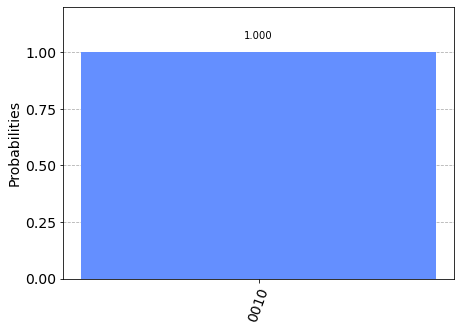

In [110]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qpe,backend=backend,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)